In [ ]:
!pip install osmnx

In [ ]:
!pip install geodatasets
!pip install contextily

In [10]:
import osmnx as ox
import networkx as nx
import pickle
import os
from google.colab import drive
import matplotlib.pyplot as plt
import geopandas
import geodatasets
import contextily as cx

In [11]:
drive.mount('/gdrive')

path = '/gdrive/MyDrive/berlin_bike_CV/'
folder = 'metadata'
name = 'DSR'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [13]:
graph_name = '_graph_weights.pkl'
graph_path = os.path.join(path, folder, name + graph_name)

with open(graph_path, 'rb') as pickle_file:
    G = pickle.load(pickle_file)

In [14]:
edge_weight = 'edge_weight'
edge_colour = 'edge_colour'

In [16]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G, nodes=True, edges=True)
gdf_edges.crs
gdf_edges_conv = gdf_edges.to_crs(epsg=3857)
ec = nx.get_edge_attributes(G, name=edge_colour)

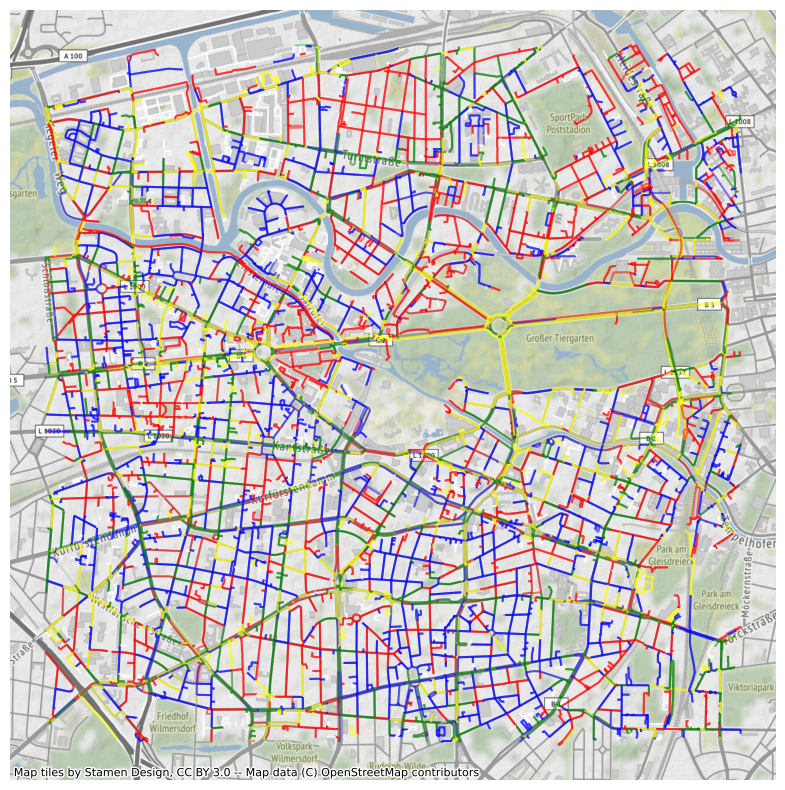

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_edges_conv.plot(ax=ax, alpha=0.5, edgecolor=list(ec.values()))
cx.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [ ]:
### search shortest path based on weights

# convert adress orig and dest to coord


# find closest point of orig ans dest to an edge


# Adresse definieren
location = (52.4822, 13.3554)

# Straßennetzwerk abrufen
graph = ox.graph_from_point(location, dist=1000, network_type="bike")

(3999114227, 1746090508, 0)
LINESTRING (13.3572364 52.4833, 13.3547238 52.4812771, 13.3548898 52.4812003)
13.3572364, 52.4833
13.3548898, 52.4812003


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 32 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


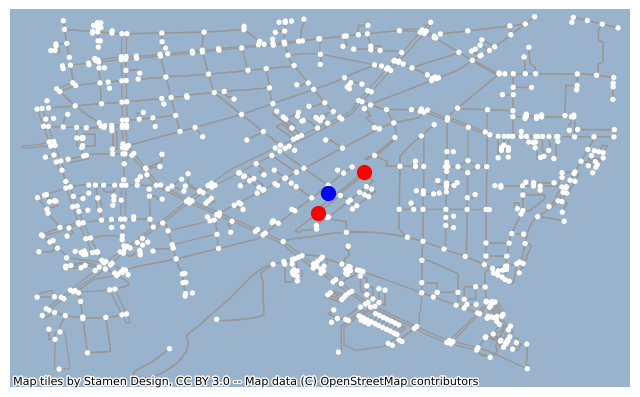

In [ ]:


(address_latitude, address_longitude) = (52.4822, 13.3554)



# nearest_node = ox.distance.nearest_nodes(graph, X=address_longitude, Y=address_latitude)
nearest_edge = ox.distance.nearest_edges(graph, X=address_longitude, Y=address_latitude)
# nearest_point = ox.distance.project_point_on_edge(graph, nearest_edge, (address_longitude, address_latitude))

print(nearest_edge)

nearest_node_1, nearest_node_2, k = nearest_edge
if 'geometry' in graph.edges[nearest_edge]:
  geometry = graph.edges[nearest_edge]['geometry']
  print(geometry)
else: print("streight line")


fig, ax = ox.plot_graph(graph, show=False, close=False)
print(f'{graph.nodes[nearest_node_1]["x"]}, {graph.nodes[nearest_node_1]["y"]}')
print(f'{graph.nodes[nearest_node_2]["x"]}, {graph.nodes[nearest_node_2]["y"]}')
ax.scatter(
    address_longitude,
    address_latitude,
    c="blue",
    s=100,
    marker="o",
)
ax.scatter(
    [graph.nodes[nearest_node_1]["x"], graph.nodes[nearest_node_2]["x"]],
    [graph.nodes[nearest_node_1]["y"], graph.nodes[nearest_node_2]["y"]],
    c="red",
    s=100,
    marker="o",
)
plt.show()

# Ziel definieren (z.B. Koordinaten oder der nächste Node im Graphen)
target = (52.2822, 13.1554)

# # Kürzeste Route berechnen
# route = nx.shortest_path(graph, source=nearest_node, target=target, weight="length")

# # Route anzeigen
# ox.plot_graph_route(graph, route)




# # find shortest path
# route = nx.shortest_path(graph, ox.distance.nearest_nodes(graph, origin[0], origin[1]),
#                          ox.distance.nearest_nodes(graph, destination[0], destination[1]))

# find edges based on points and weights of the shortest path

# plot single edge segments based on color



In [ ]:
# # find edges based on points and weights of the shortest path
# for i in

# # plot single edge segments based on color



In [ ]:
# # applying edge attribute
# nx.set_edge_attributes(G, default_value, name=edge_weight)
# nx.set_edge_attributes(G, default_color, name=edge_colour)

In [ ]:
# def lookup_weight(label):
#   weight = int(100)
#   if label == 0:
#     weight = 5
#   elif label == 1:
#     weight = 10
#   elif label == 2:
#     weight = 1
#   elif label == 3:
#     weight = 2
#   else:
#     weight = 100

#     # TODO: define the value for the street
#   return weight

In [ ]:
# def lookup_colour(weight):

#   # TODO: define color_lookup
#   clr = 'white'
#   if weight == 5:
#     clr = 'blue'
#   elif weight == 10:
#     clr = 'red'
#   elif weight == 1:
#     clr = 'yellow'
#   elif weight == 2:
#     clr = 'green'
#   else:
#     clr = 'white'
#   return clr

In [ ]:
# # load labeled edges per tile
# for tile_quadkey in tiles:
#   tile_path = os.path.join(path, tile_folder, tile_quadkey + '_labeled.pkl')
#   if os.path.exists(tile_path):
#     with open(tile_path, 'rb') as pickle_file:
#       tiles_labeled = pickle.load(pickle_file)

#     for edge, value in tiles_labeled.items():
#       if value:
#         weight = lookup_weight(value[0]['label'])
#         color = lookup_colour(weight)
#         G.edges[edge][edge_weight] = weight
#         G.edges[edge][edge_colour] = color

In [ ]:
# # save graph with weights
# graph_name = '_graph_weights.pkl'
# graph_path = os.path.join(path, folder, name + graph_name)
# with open(graph_path, 'wb') as pickle_file:
#     pickle.dump(G, pickle_file)

In [ ]:
# with open(graph_path, 'rb') as pickle_file:
#     G = pickle.load(pickle_file)
